<a href="https://colab.research.google.com/github/jonkrohn/ML-foundations/blob/master/notebooks/7-algos-and-data-structures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorithms & Data Structures

This class, *Algorithms & Data Structures*, introduces the most important computer science topics for machine learning, enabling you to design and deploy computationally efficient data models. 

Through the measured exposition of theory paired with interactive examples, you’ll develop a working understanding of all of the essential data structures across the list, dictionary, tree, and graph families. You’ll also learn the key algorithms for working with these structures, including those for searching, sorting, hashing, and traversing data. 

The content covered in this class is itself foundational for the *Optimization* class of the *Machine Learning Foundations* series.

Over the course of studying this topic, you'll: 

* Use “Big O” notation to characterize the time efficiency and space efficiency of a given algorithm, enabling you to select or devise the most sensible approach for tackling a particular machine learning problem with the hardware resources available to you.
* Get acquainted with the entire range of the most widely-used Python data structures, including list-, dictionary-, tree-, and graph-based structures. 
* Develop an understanding of all of the essential algorithms for working with data, including those for searching, sorting, hashing, and traversing. 


**Note that this Jupyter notebook is not intended to stand alone. It is the companion code to a lecture or to videos from Jon Krohn's [Machine Learning Foundations](https://github.com/jonkrohn/ML-foundations) series, which offer detail on the following:**

*Segment 1: Introduction to Data Structures and Algorithms*
* A Brief History of Data and Data Structures
* A Brief History of Algorithms
* “Big O” Notation for Time and Space Complexity 
 
*Segment 2: Lists and Dictionaries*
* List-Based Data Structures: Arrays, Linked Lists, Stacks, Queues, and Deques 
* Searching and Sorting: Binary, Bubble, Merge, and Quick
* Dictionaries: Sets and Maps
* Hashing: Hash Tables and Hash Maps

*Segment 3: Trees and Graphs*
* Trees: Binary Search, Heaps, and Self-Balancing
* Graphs: Terminology, Coded Representations, Properties, Traversals, and Paths
* Resources for Further Study of Data Structures & Algorithms


# Segment 1: Intro to Data Structures & Algorithms

### "Big O" Notation

In [34]:
import numpy as np
import tensorflow as tf
import torch
import pandas as pd
import seaborn as sns
import time

#### Constant Time

In [2]:
def take_first(my_list):
    return my_list[0]

In [3]:
short_list = [13, 25, 42]

In [4]:
tic = time.process_time() # if using a version of Python older than 3.3, you can use time.clock() here
first = take_first(short_list)
toc = time.process_time()

In [5]:
first

13

In [6]:
toc-tic

5.45569999998996e-05

In [7]:
long_list = [42] * 10**8 # one hundred million items

In [8]:
len(long_list)

100000000

In [9]:
tic = time.process_time()
first = take_first(long_list)
toc = time.process_time()

In [10]:
toc-tic

5.060399999989862e-05

In [11]:
list_lengths = [10**l for l in range(1, 8)]
list_lengths

[10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [12]:
constant_times = []

for l in list_lengths:
    lst = [42]*l
  
    tic = time.process_time()
    x = take_first(lst)
    toc = time.process_time()
  
    constant_times.append(toc-tic)

In [13]:
import pandas as pd

In [14]:
constant_df = pd.DataFrame(list(zip(list_lengths, constant_times)), columns=['N', 'time'])
constant_df

,N,time
0,10,0.000003
1,100,0.000000
2,1000,0.000000
3,10000,0.000000
4,100000,0.000003
5,1000000,0.000004
6,10000000,0.000007


#### Linear Time

In [15]:
def find_max(my_list):
    max_value = my_list[0]
    for i in range(len(my_list)):
        if my_list[i] > max_value:
            max_value = my_list[i]
    return max_value

In [16]:
tic = time.process_time()
largest = find_max(short_list)
toc = time.process_time()

In [17]:
toc-tic

0.00010165600000000552

In [18]:
largest

42

In [19]:
tic = time.process_time()
largest = find_max(long_list)
toc = time.process_time()

In [20]:
toc-tic

4.295659822

In [21]:
largest

42

In [22]:
linear_times = []

for l in list_lengths:
    lst = [42]*l
  
    tic = time.process_time()
    x = find_max(lst)
    toc = time.process_time()
  
    linear_times.append(toc-tic)

In [23]:
linear_df = pd.DataFrame(list(zip(list_lengths, linear_times)), columns=['N', 'time'])
linear_df

,N,time
0,10,0.000015
1,100,0.000005
2,1000,0.000093
3,10000,0.000463
4,100000,0.004512
5,1000000,0.047782
6,10000000,0.427008


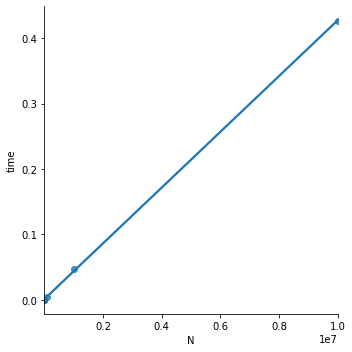

In [24]:
_ = sns.lmplot(x='N', y='time', data=linear_df, ci=None) # linear model (regression) plot

#### Polynomial Time

In [25]:
def element_multiplier(my_list): 
    for i in range(len(my_list)):
        for j in range(len(my_list)):
            x = my_list[i] * my_list[j]

In [26]:
list_lengths

[10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [27]:
list_lengths[:4] # compute time gets annoyingly long from list_lengths[5] onward

[10, 100, 1000, 10000]

In [28]:
granular_list_lengths = list_lengths[:4] + [50, 500, 5000]
granular_list_lengths.sort()
granular_list_lengths

[10, 50, 100, 500, 1000, 5000, 10000]

In [30]:
poly_times = []

for l in granular_list_lengths:
    lst = [42]*l

    tic = time.process_time()
    x = element_multiplier(lst)
    toc = time.process_time()

    poly_times.append(toc-tic)

In [31]:
poly_df = pd.DataFrame(list(zip(granular_list_lengths, poly_times)), columns=['N', 'time'])
poly_df

,N,time
0,10,0.000017
1,50,0.000250
2,100,0.000757
3,500,0.022177
4,1000,0.066822
5,5000,1.626421
6,10000,6.493020


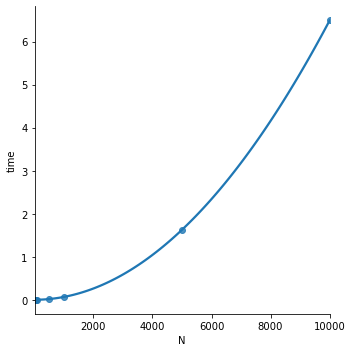

In [32]:
_ = sns.lmplot(x='N', y='time', data=poly_df, ci=None, order=2)

**In Big O notation**:

* Constant: O(1)
* Linear: O($N$)
* Polynomial: O($N^2$)

**Other common runtimes**:

* Logarithmic: O(log $N$)
* Exponential: O($2^N$)
* O($N$ log $N$)
* O($N!$)

**Return to slides here.**

## Segment 2: Lists and Dictionaries

### List-Based Data Structures

#### Lists

In [48]:
t = [25, 2, 5]
t

[25, 2, 5]

In [49]:
t.append(26)
t

[25, 2, 5, 26]

In [61]:
t[2]

5

Cannot apply mathematical operators, e.g., try uncommenting: 

In [51]:
# t/2

**Return to slides here.**

#### Arrays

In [52]:
x = np.array([25, 2, 5])
x

array([25,  2,  5])

In [63]:
x[2]

5

In [56]:
x/2.

array([12.5,  1. ,  2.5])

In [38]:
y = torch.tensor([[25, 2, 5], [26, 1, 4]])
y

tensor([[25,  2,  5],
        [26,  1,  4]])

In [64]:
y[0, 2]

tensor(5)

In [55]:
y/2.

tensor([[12.5000,  1.0000,  2.5000],
        [13.0000,  0.5000,  2.0000]])

In [59]:
z = tf.Variable([[[0, 1], [2, 3]], [[25, 26], [7, 9]]], dtype=tf.float16)
z

<tf.Variable 'Variable:0' shape=(2, 2, 2) dtype=float16, numpy=
array([[[ 0.,  1.],
        [ 2.,  3.]],

       [[25., 26.],
        [ 7.,  9.]]], dtype=float16)>

In [62]:
z[1, 0, 0]

<tf.Tensor: shape=(), dtype=float16, numpy=25.0>

In [60]:
z/2.

<tf.Tensor: shape=(2, 2, 2), dtype=float16, numpy=
array([[[ 0. ,  0.5],
        [ 1. ,  1.5]],

       [[12.5, 13. ],
        [ 3.5,  4.5]]], dtype=float16)>

Efficient to append items to end of list...

In [41]:
np.append(x, 26)

array([25,  2,  5, 26])

...but computationally inefficient to add at start or middle of long list as later items will need to be shifted to later in list
* Worst case is insert at beginning of list: O($N$))
* (Note that appending or searching by index are O(1))

#### Linked Lists